## Exploring Classification tree on movie dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Movie_classification.csv',header = 0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df.shape

(506, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Impute missing values

In [6]:
df['Time_taken'].mean()

157.39149797570855

In [7]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Dummy variable creation

In [9]:
df = pd.get_dummies(df, columns = ['3D_available','Genre'],drop_first = True)

In [10]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


## Dataset splitting

In [11]:
X = df.loc[:,df.columns != 'Start_Tech_Oscar']

In [12]:
X.shape

(506, 20)

In [13]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [14]:
y = df['Start_Tech_Oscar']

In [15]:
y

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    0
504    0
505    0
Name: Start_Tech_Oscar, Length: 506, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

## Training Classification tree

In [18]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3) # not advisable to increase depth more than 5

In [19]:
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

## Predict using training model

In [20]:
y_train_pred = clftree.predict(X_train)
y_test_pred = clftree.predict(X_test)

## Model Performance

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [22]:
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [23]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [24]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

## Plotting decsion tree

In [25]:
dot_data = tree.export_graphviz(clftree, out_file=None ,feature_names = X_train.columns, filled=True)

In [26]:
from IPython.display import Image

In [27]:
import pydotplus

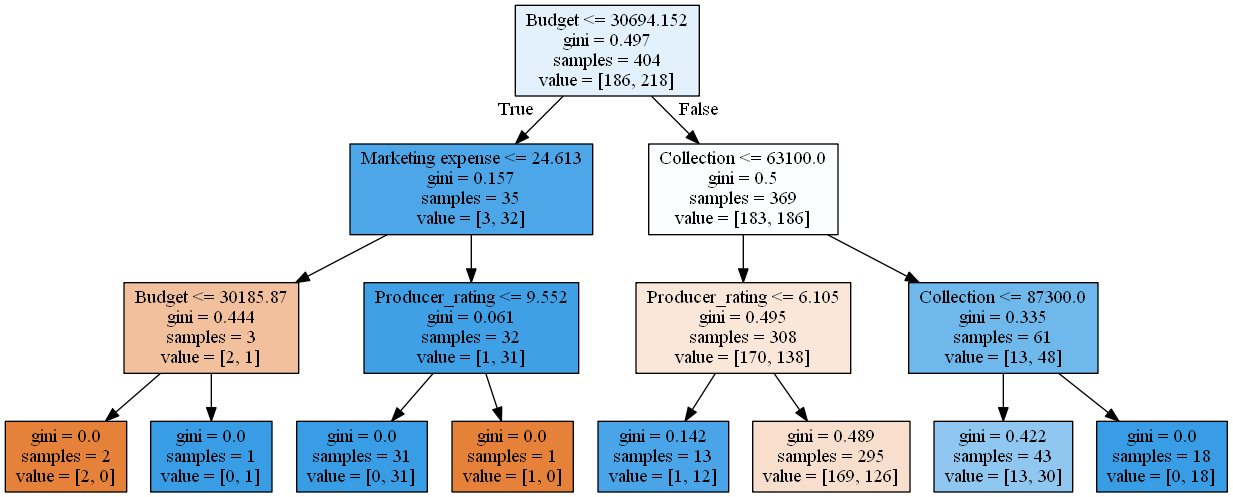

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Controlling tree growth

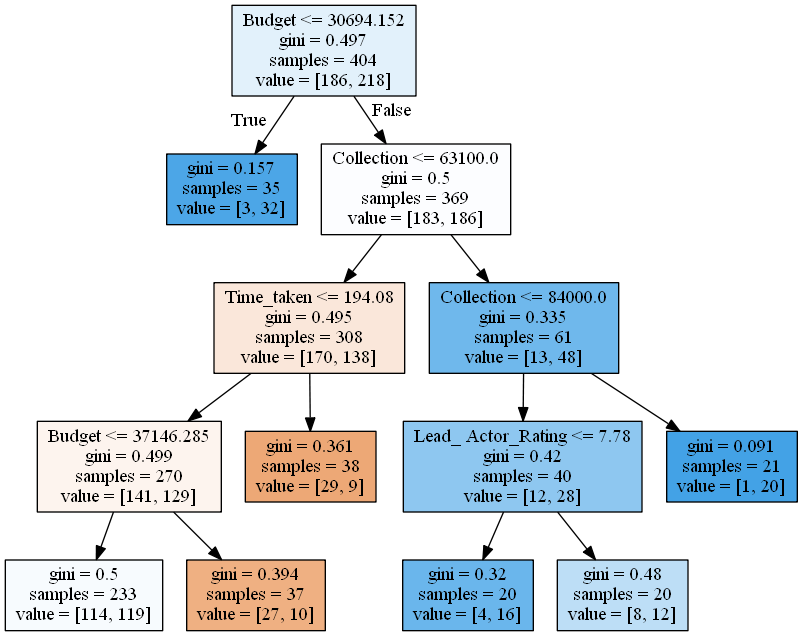

In [30]:
clftree1 = tree.DecisionTreeClassifier(min_samples_leaf = 20 , max_depth = 4)
clftree1.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree1, out_file=None, feature_names = X_train.columns,filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

In [31]:
accuracy_score(y_test, clftree1.predict(X_test))

0.5588235294117647

## Bagging

In [32]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier()

In [33]:
from sklearn.ensemble import BaggingClassifier

In [34]:
bag_clf = BaggingClassifier(base_estimator = clftree,n_estimators = 1000, bootstrap=True,n_jobs=1,random_state = 42)

In [35]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=1, random_state=42)

In [36]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [37]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6176470588235294

## Random forrest 

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_clf = RandomForestClassifier(n_estimators = 1000,n_jobs=1,random_state=42)

In [40]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=1, random_state=42)

In [41]:
confusion_matrix(y_test,rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [42]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

## Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV

In [44]:
rf_clf = RandomForestClassifier(n_estimators = 250, random_state = 42)

In [45]:
params_grid = { "max_features": [4,5,6,7,8,9,10], "min_samples_split": [2,3,10],}

In [46]:
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=1,cv=5,scoring='accuracy')

In [47]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [48]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [49]:
cvrf_clf = grid_search.best_estimator_

In [50]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6274509803921569

In [51]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]], dtype=int64)

## Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [54]:
accuracy_score(y_test,gbc_clf.predict(X_test))

0.5784313725490197

In [55]:
gbc_clf1 = GradientBoostingClassifier(learning_rate = 0.02,n_estimators = 1000, max_depth = 1)
gbc_clf1.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [56]:
accuracy_score(y_train,gbc_clf1.predict(X_train))

0.7623762376237624

In [57]:
accuracy_score(y_test,gbc_clf.predict(X_test))

0.5784313725490197

## Ada boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

In [60]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [61]:
accuracy_score(y_train, ada_clf.predict(X_train))

0.8886138613861386

In [62]:
accuracy_score(y_test,ada_clf.predict(X_test))

0.6274509803921569

In [63]:
ada_clf1 = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 500)

In [64]:
ada_clf1.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=500)

In [68]:
accuracy_score(y_test,ada_clf1.predict(X_test))

0.5784313725490197

## XG Boost

In [69]:
import xgboost as xgb

### Paramter Tuning
1. General Parameters: Guide the overall functioninng
2. Booster Parameters: Guide the individual booster (Tree/regression) at each step
3. Learning Task parameters: Guide the optimization performed

In [71]:
xgb_clf = xgb.XGBClassifier(max_depth=5,n_esimators=10000,learning_rate=0.3,n_jobs=-1)

In [72]:
xgb_clf.fit(X_train,y_train)

[19:10:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_esimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_esimators=10000, n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [73]:
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6666666666666666

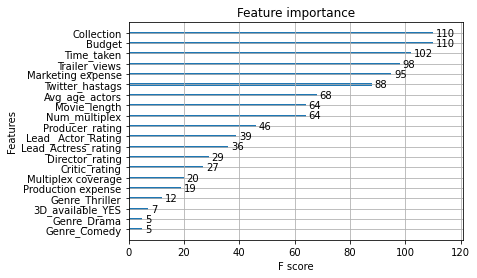

In [74]:
xgb.plot_importance(xgb_clf)

In [76]:
xgb_clf = xgb.XGBClassifier(n_estimators = 250, learning_rate =0.1,random_stae=42)

In [77]:
param_test1 = {
    'max_depth':range(3,10,2),
    'gamma':[0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[1e-2, 0.1,1]
    
}

In [79]:
grid_search = GridSearchCV(xgb_clf,param_test1,n_jobs=-1,cv=5, scoring='accuracy')

In [80]:
grid_search.fit(X_train,y_train)

[19:17:19] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { random_stae } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=250, n_jobs=None,
                                     num_parallel_tree=None, random_stae=42,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tr

In [81]:
cvxg_clf = grid_search.best_estimator_

In [82]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6862745098039216

In [83]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.3,
 'max_depth': 9,
 'reg_alpha': 0.1,
 'subsample': 0.9}